In [ ]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import arviz as az # trabajar bayesian y stats
import pymc3 as pm #paquete Jags
import pandas as pd
import seaborn as sns

# Uso de la función de verosimilitud Poisson con previa Gamma

Análisis de eventos que son independientes entre sí, con probabilidad baja. Ejemplos: Recepción de WhatsApp en una hora, nº de llamadas en un día, número de accidentes en un determinado lugar en un período de tiempo ...

# Definición de Funciones
## Verosimilitud - Linkelihood.

Función de probabilidad de Poisson:
$p(Y=y\mid \lambda)=\frac{e^{-\lambda} \lambda^y}{y!}$\
$\text{E}(Y)=\lambda$\
$\text{Var}(Y)=\lambda$\
Función de Verosimilitud
$$L(\lambda,y)=\Pi\frac{e^{-\lambda} \lambda^{y_{i}}}{y_{i}!}$$

Observamos cómo se comporta la distribución gamma



[]

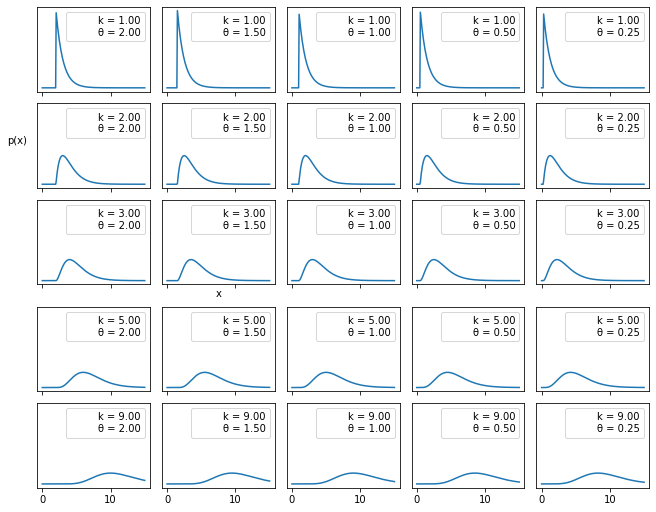

In [4]:
k_params = [1, 2, 3, 5, 9]
θ_params = [2, 1.5, 1, 0.5, 0.25]
x = np.linspace(0, 15, 200)
_, ax = plt.subplots(len(k_params), len(θ_params), sharex=True, 
                     sharey=True,
                     figsize=(9, 7), constrained_layout=True)
for i in range(5):
    for j in range(5):
        k = k_params[i]
        θ = θ_params[j]
        y = stats.gamma(k, θ).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="k = {:3.2f}\nθ = {:3.2f}".format(k, 
                     θ), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])


# Ejemplo

Análisis del número de WhatsApp que reciben en una hora una población determinada.

*OBSERVACIONES*

Muestra:
```{r}
#Cargamos un vector con la muestra de 25 observaciones de distintas personas con los datos de recepción de WhatsApps en 1 hora.
obs <- (c(134, 121, 150, 141, 143, 133, 145, 135, 141, 141, 137, 154, 133, 135, 154, 143, 126, 149, 143, 149, 130, 129, 142, 126, 130))
```

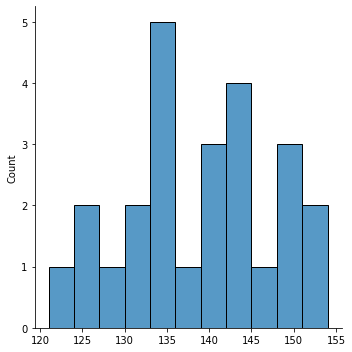

In [5]:
obs = np.array([134, 121, 150, 141, 143, 133, 145, 135, 141, 141, 137, 154, 133, 135, 154, 143, 126, 149, 143, 149, 130, 129, 142, 126, 130])
sns.displot(obs,  binwidth=3)

# Datos Previos - Nuestra creencia

Damos por buenos que los números de WhatsApps que se reciben en 1h corresponden a una distribución de Gamma con:\
nº medio de whatsApps (según nuestra creencia) -> 128\
varianza (indica incerteza del dato anterior) -> 16\

Para la representarción de la función Gamma necesitamos los valores\
$E(\lambda)=\frac{a}{b}$\
$Var(\lambda)=\frac{a}{b^2}$\

In [7]:
mu = 128
sigma = 16
a = mu**2/sigma
b= mu/sigma
with pm.Model() as model:
    θ = pm.Gamma('θ', alpha=a, beta=b) #prior
    y = pm.Poisson('y', mu=θ, observed=obs) # Likelihood
    trace = pm.sample(1000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 1500/1500 [00:00<00:00, 2313.41it/s]


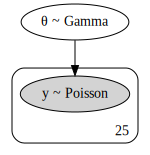

In [8]:
pm.model_to_graphviz(model) # mostramos la estructura

/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17316edef0>,
      dtype=object)

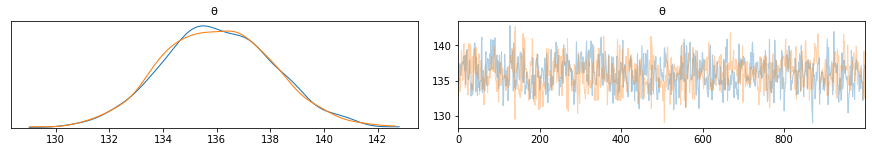

In [9]:
#dibujamos la posterior
az.plot_trace(trace)

In [10]:
# El valor en R ha sido 136
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,136.037,2.054,132.131,139.785,0.076,0.054,727.0,726.0,732.0,1338.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1730b1e470>],
      dtype=object)

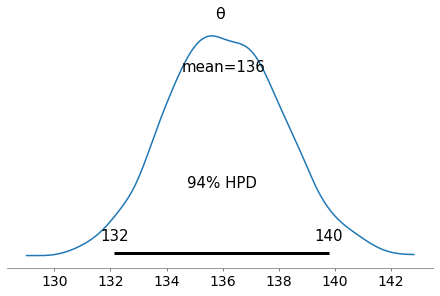

In [11]:
#Dibujamos la posterior
az.plot_posterior(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1730aa6dd8>],
      dtype=object)

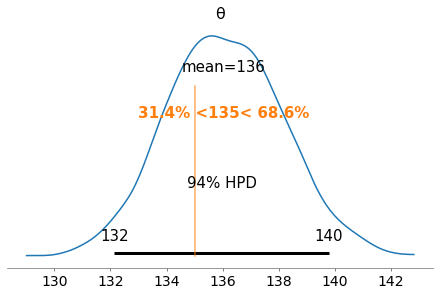

In [12]:
#Qué probabilidad hay que la distribución de la media esté por encima los 135 whatsApp's?  El valor en R ha sido del 0.6875175
az.plot_posterior(trace, ref_val=135) 